# Exercise 2: Data Analysis with Python

Based on this great tutorial: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

# Our Task:  Loan Prediction Practice Problem

From the challange hosted at: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## The Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)


Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.

You may upload the solution in the format of "sample_submission.csv"

## Setups

To begin, start iPython interface in Inline Pylab mode by typing following on your terminal / windows command prompt:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This opens up iPython notebook in pylab environment, which has a few useful libraries already imported. Also, you will be able to plot your data inline, which makes this a really good environment for interactive data analysis. You can check whether the environment has loaded correctly, by typing the following command (and getting the output as seen in the figure below):

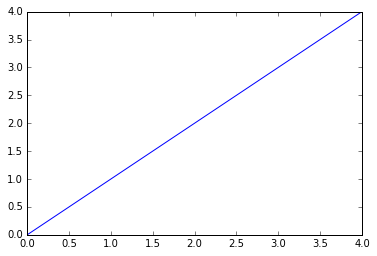

In [2]:
plot(arange(5))

Following are the libraries we will use during this task:
- numpy
- matplotlib
- pandas

Please note that you do not need to import matplotlib and numpy because of Pylab environment. I have still kept them in the code, in case you use the code in a different environment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

After importing the library, you read the dataset using function read_csv(). The file is assumed to be downloaded from the moodle to the data folder in your working directory.

In [4]:
df = pd.read_csv("./data/train.csv") #Reading the dataset in a dataframe using Pandas

## Let’s begin with exploration

### Quick Data Exploration

Once you have read the dataset, you can have a look at few top rows by using the function head()

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


This should print 10 rows. Alternately, you can also look at more rows by printing the dataset.

Next, you can look at summary of numerical fields by using describe() function

In [6]:
df.describe() # get the summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output

### Task 1: inferencing from describe()

1. How many missing values we have and in which attributes? (compare counts)
2. What is the percentage of applicants with a credit_history (=1) ?
3. Check the distributions of ApplicantIncome and CoapplicantIncome.

### Check yourself:

Here are a few inferences, you can draw by looking at the output of describe() function:
1. 
    - LoanAmount has (614 – 592) 22 missing values.
    - Loan_Amount_Term has (614 – 600) 14 missing values.
    
    - Credit_History has (614 – 564) 50 missing values.
    
2. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
3. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome. Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.



For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of ApplicantIncome using the following commands:

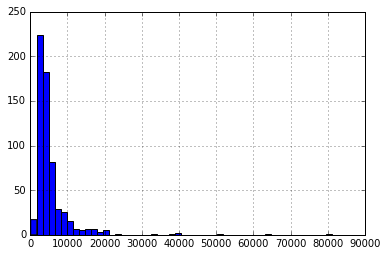

In [8]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot can be plotted by:

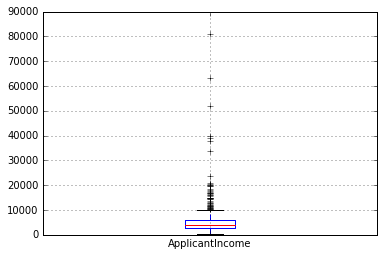

In [9]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

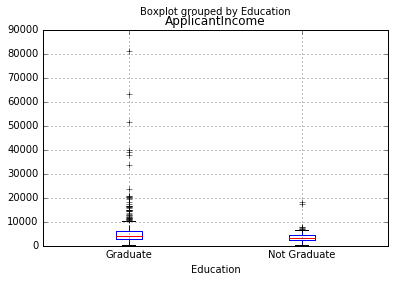

In [10]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Task 2: Distribution Analysis

Plot the histogram and boxplot of LoanAmount

## Check yourself:

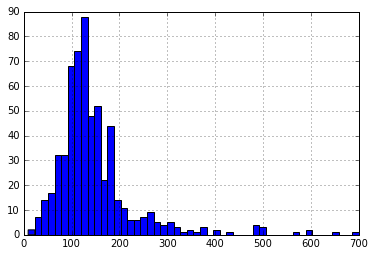

In [11]:
df['LoanAmount'].hist(bins=50)

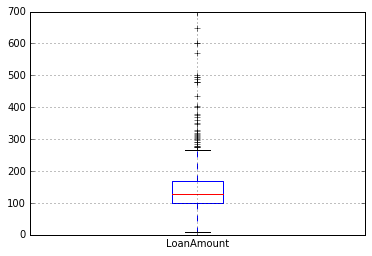

In [12]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

## Categorical variable analysis

Frequency Table for Credit History:

In [13]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [14]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


This can be plotted as a bar chart using the “matplotlib” library with following code:

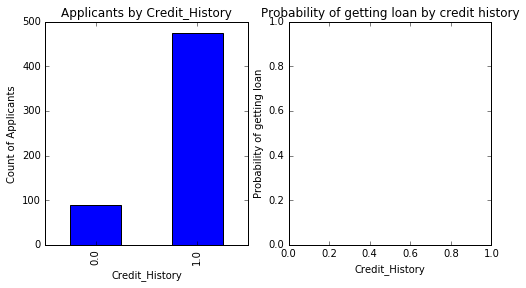

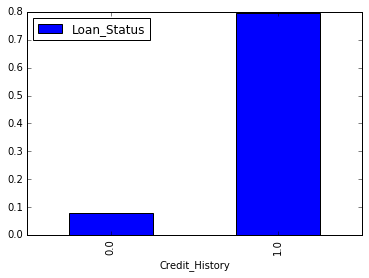

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart::

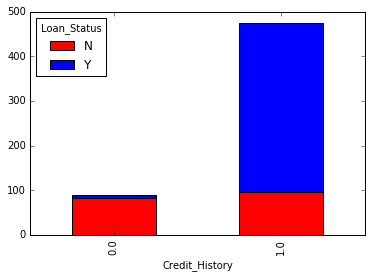

In [16]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We just saw how we can do exploratory analysis in Python using Pandas. I hope your love for pandas (the animal) would have increased by now – given the amount of help, the library can provide you in analyzing datasets.

Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques. I would strongly urge that you take another dataset and problem and go through an independent example before reading further.

# Data Munging in Python : Using Pandas

## Data munging – recap of the need

While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

## Check missing values in the dataset

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset.

This command should tell us the number of missing values in each column as isnull() returns 1, if the value is null.

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data. 

Note: Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.

## How to fill missing values in LoanAmount?


How to fill missing values in LoanAmount?

There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:


In [18]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

The other extreme could be to build a supervised learning model to predict loan amount on the basis of other variables and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, I’ll rather take an approach, which lies some where in between these 2 extremes. A key hypothesis is that whether a person is educated or self-employed can combine to give a good estimate of loan amount.

But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [19]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [20]:
#df['Self_Employed'].fillna('No',inplace=True)

####Self Employe missing value

If we replace all na with "No" the ratio will be more than 86% for "No". So we want to preserve this ratio, so radomly set 86% to No and the remaining to Yes

In [21]:
from numpy.random import choice
draw = choice(["Yes","No"], 1, p=[0.14,0.86])[0]
df['Self_Employed'].fillna(draw,inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [22]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


Define function to return value of this pivot_table:

In [23]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

Replace missing values:

In [24]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

This should provide you a good way to impute missing values of loan amount.

## How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

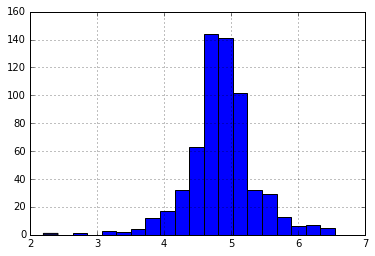

In [25]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

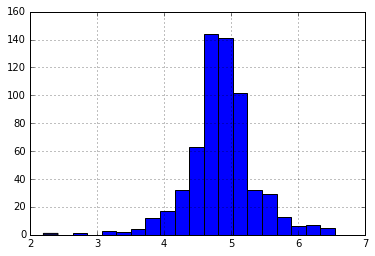

In [26]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

Now we see that the distribution is much better than before. 

# Task 3: Remove nulls

1. Impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History
2. Also, I encourage you to think about possible additional information which can be derived from the data. For example, creating a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

## check Yourself

In [27]:
df['Loan_Amount_Term'].fillna(360, inplace=True)
df['Credit_History'].fillna(1, inplace=True)

In [28]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
df['Dependents'].fillna(0, inplace=True)

In [30]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
#df['Married'].fillna('Yes', inplace=True)
#As in the self employed
draw = choice(["Yes","No"], 1, p=[0.66,0.34])[0]
df['Married'].fillna(draw,inplace=True)

In [32]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
#df['Gender'].fillna('Male', inplace=True)
#Save the ratio
draw = choice(["Male","Female"], 1, p=[0.82,0.18])[0]
df['Gender'].fillna(draw,inplace=True)

Next, we will look at making predictive models.

# Building a Predictive Model in Python

After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [34]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [36]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores. 

In [37]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression

Let’s make our first Logistic Regression model. One way would be to take all the variables into the model but this might result in overfitting. In simple words, taking all variables might result in the model understanding complex relations specific to the data and will not generalize well. 

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

1. Applicants having a credit history (remember we observed this in exploration?)
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

So let’s make our first model with ‘Credit_History’.

In [38]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


We can try different combination of variables:

In [39]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)
#write_predict(model.predict(test_df[predictor_var]), test_df)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

1. Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
2. Better modeling techniques. Let’s explore this next.

## Decision Tree

Decision tree is another method for making a predictive model. It is known to provide higher accuracy than logistic regression model. 

In [40]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Here the model based on categorical variables is unable to have an impact because Credit History is dominating over them. Let’s try a few numerical variables:

# Task 4: Modeling the Data

1. Train a decision tree classifier that accepts the following attributes as input: Credit_History, Loan_Amount_Term, LoanAmount_log
2. Is it better that the previous decision tree?

## Check Yourself:

In [41]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.536%


2.Not much better according to the test score

Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:

## Random Forest

Random forest is another algorithm for solving the classification problem. 

An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [42]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.526%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

1. Reducing the number of predictors
2. Tuning the model parameters

Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [43]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.282345
TotalIncome_log     0.260660
LoanAmount_log      0.224758
Dependents          0.051472
Property_Area       0.047475
Loan_Amount_Term    0.043015
Married             0.025990
Education           0.023181
Gender              0.020788
Self_Employed       0.020317
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [44]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25)
#predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Gender','Married','Self_Employed','Dependents','Property_Area']
predictor_var = ['Credit_History','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)
#write_predict(model.predict(test_df[predictor_var]), test_df)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.

You would have noticed that even after some basic parameter tuning on random forest, we have reached a cross-validation accuracy only slightly better than the original logistic regression model. This exercise gives us some very interesting and unique learning:

1. Using a more sophisticated model does not guarantee better results.
2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
3. Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and creativity lies in enhancing your features to better suit the model.

Be proud of yourself for getting this far!
You are invited to improve your result and submit to the site to test your place in the leaderboard. 

### Feature engineering

###Data preprocessing
Same as above, just in a function

In [45]:
from numpy.random import choice
from sklearn.preprocessing import LabelEncoder
def preprocess(df, is_test):   
    draw = choice(["Yes","No"], 1, p=[0.14,0.86])[0]
    df['Self_Employed'].fillna(draw,inplace=True)
    df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
    df['LoanAmount_log'] = np.log(df['LoanAmount'])
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncome_log'] = np.log(df['TotalIncome'])
    df['Loan_Amount_Term'].fillna(360, inplace=True)
    draw = choice([1,0], 1, p=[0.14,0.86])[0]
    df['Credit_History'].fillna(1, inplace=True)
    df['Dependents'].fillna(0, inplace=True)
    draw = choice(["Yes","No"], 1, p=[0.66,0.34])[0]
    df['Married'].fillna(draw,inplace=True)
    draw = choice(["Male","Female"], 1, p=[0.82,0.18])[0]
    df['Gender'].fillna(draw,inplace=True)    
    if is_test:
        var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
    else:
        var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i].astype(str))
        
def write_predict(result, df):    
    df["Loan_Status"] = ['Y' if x==1 else 'N' for x in result]
    df.to_csv('./data/result.csv',columns=['Loan_ID','Loan_Status'],index=False)

####Test Set
read again and do the same preprocessing for train and test before build the classification model

In [46]:
test_df = pd.read_csv("./data/test.csv") #Reading the dataset in a dataframe using Pandas
preprocess(test_df,True)
df = pd.read_csv("./data/train.csv") #Reading the dataset in a dataframe using Pandas
preprocess(df, False)

###Extra Tree
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [47]:
model = ExtraTreesClassifier(n_estimators=140)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)
write_predict(model.predict(test_df[predictor_var]), test_df)

Accuracy : 100.000%
Cross-Validation Score : 75.895%


###Gradient Boosting
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [48]:
model = GradientBoostingClassifier(n_estimators=200)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)
write_predict(model.predict(test_df[predictor_var]), test_df)
#With different loss function
predictor_var = ['Self_Employed', 'Credit_History', 'Property_Area']
model = GradientBoostingClassifier(n_estimators=200,loss='exponential')
classification_model(model, df,predictor_var,outcome_var)
write_predict(model.predict(test_df[predictor_var]), test_df)

Accuracy : 92.834%
Cross-Validation Score : 77.043%
Accuracy : 80.945%
Cross-Validation Score : 80.946%


Submissions
![submissions.png](attachment:submissions.png)

Leaderboard
![leaderboard.png](attachment:leaderboard.png)